In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/drive')

/
Mounted at /content/drive


In [ ]:
import os
os.makedirs("/content/dataset")

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 16522, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (104/104), done.
remote: Total 16522 (delta 50), reused 52 (delta 16), pack-reused 16402
Receiving objects: 100% (16522/16522), 15.18 MiB | 6.53 MiB/s, done.
Resolving deltas: 100% (11310/11310), done.


In [ ]:
!nvidia-smi

Mon Feb  5 11:13:29 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   45C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
! sudo cp -v -r "/content/drive/MyDrive/Dataset/LP.zip" "/content/dataset"

'/content/drive/MyDrive/Dataset/LP.zip' -> '/content/dataset/LP.zip'


In [ ]:
!unzip "/content/dataset/LP.zip" -d "/content/dataset/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/dataset/LP/labels/train/1297_0_936.txt  
  inflating: /content/dataset/LP/labels/train/1297_1_936.txt  
  inflating: /content/dataset/LP/labels/train/1297_2_936.txt  
  inflating: /content/dataset/LP/labels/train/1297_3_936.txt  
  inflating: /content/dataset/LP/labels/train/1297_4_936.txt  
  inflating: /content/dataset/LP/labels/train/1298_0_937.txt  
  inflating: /content/dataset/LP/labels/train/1298_1_937.txt  
  inflating: /content/dataset/LP/labels/train/1298_2_937.txt  
  inflating: /content/dataset/LP/labels/train/1298_3_937.txt  
  inflating: /content/dataset/LP/labels/train/1298_4_937.txt  
  inflating: /content/dataset/LP/labels/train/1299_0_938.txt  
  inflating: /content/dataset/LP/labels/train/1299_1_938.txt  
  inflating: /content/dataset/LP/labels/train/1299_2_938.txt  
  inflating: /content/dataset/LP/labels/train/1299_3_938.txt  
  inflating: /content/dataset/LP/labels/train/1299_4_938.txt  
  in

In [ ]:
import os
import pandas as pd
import numpy as np
import random
import shutil
from shutil import copyfile
import tensorflow as tf
import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

In [ ]:
%cd /yolov5

/yolov5


In [ ]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 723.1/723.1 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 84.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
!pip install wandb
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
!python train.py --img 416 --batch 16 --epochs 30 --data data.yaml --weights yolov5n.pt


wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2024-03-25 21:17:34.152688: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-25 21:17:34.152736: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-25 21:17:34.153940: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
wandb: Currently logged in as: sifatk69. Use `wandb login --relogin` to force relogin
train: weights=yolov5n.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=4

In [ ]:
!python train.py --img 640 --batch 20 --epochs 10 --data data.yaml --weights yolov5l.pt

2024-02-06 07:03:16.636511: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 07:03:16.636568: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 07:03:16.637961: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5l.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=10, batch_size=20, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optim

KeyboardInterrupt: 

In [ ]:
!python train.py --img 640 --batch 20 --epochs 30 --data data.yaml --weights yolov5m.pt

2024-02-06 07:28:36.126224: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-06 07:28:36.126271: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-06 07:28:36.127821: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5m.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=20, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optim

In [ ]:
!python train.py --img 640 --batch 50 --epochs 30 --data data.yaml --weights yolov5n.pt

2024-03-18 19:43:21.839448: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-18 19:43:21.839497: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-18 19:43:21.841090: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5n.pt, cfg=, data=data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=50, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optim

# Remove

In [ ]:
import os

# Directory path containing your text files
txt_files_directory = '/content/dataset/Dataset/labels/test'

# Set to store unique class labels across all files
unique_labels_set = set()

# Iterate through each text file
for txt_file in os.listdir(txt_files_directory):
    if txt_file.endswith('.txt'):
        file_path = os.path.join(txt_files_directory, txt_file)

        # Read the first line of the text file
        with open(file_path, 'r') as file:
            first_line = file.readline()

        # Extract the class label from the first line
        if first_line:
            first_class_label = first_line.split()[0]

            # Add the class label to the set of unique labels
            unique_labels_set.add(first_class_label)

# Print the unique class labels across all files
print("Unique Class Labels from the first line of all files:", unique_labels_set)


Unique Class Labels from the first line of all files: {'40', '62', '51', '86', '79', '37', '46', '55', '97', '58', '0', '95', '39', '74', '48', '65', '60', '72', '59', '41', '90', '35', '94', '98', '53', '63', '36', '87', '96', '88', '80', '42', '77', '91', '83', '66', '92', '93', '81', '45', '89', '75', '64', '50', '85', '61', '99', '67', '47', '68', '54', '56', '69', '82', '5', '76', '70', '38', '73', '78', '43', '71', '49', '52', '84', '57', '44'}


In [ ]:
import os

# Directory path containing your text files
txt_files_directory = '/content/dataset/load'

# List to store names of files containing class label 105
files_with_label_105 = []

# Iterate through each text file
for txt_file in os.listdir(txt_files_directory):
    if txt_file.endswith('.txt'):
        file_path = os.path.join(txt_files_directory, txt_file)

        # Read the first line of the text file
        with open(file_path, 'r') as file:
            first_line = file.readline()

        # Extract the class label from the first line
        if first_line:
            first_class_label = int(first_line.split()[0])

            # Check if the class label is equal to 105
            if first_class_label ==  10:
                files_with_label_105.append(txt_file)

# Print the names of files containing class label 105
if files_with_label_105:
    print("Files containing class label 105:", files_with_label_105)
else:
    print("No files found with class label 105.")


No files found with class label 105.


In [ ]:
import os

# Directory path containing your image and text files
directory_path = '/content/dataset/load'

# File names to be removed
image_file_name = '1844.jpg'
text_file_name = '1844.txt'

# Full paths to the files
image_file_path = os.path.join(directory_path, image_file_name)
text_file_path = os.path.join(directory_path, text_file_name)

# Check if the files exist before removing them
if os.path.exists(image_file_path):
    os.remove(image_file_path)
    print(f"File {image_file_name} removed successfully.")
else:
    print(f"File {image_file_name} does not exist.")

if os.path.exists(text_file_path):
    os.remove(text_file_path)
    print(f"File {text_file_name} removed successfully.")
else:
    print(f"File {text_file_name} does not exist.")


File 1844.jpg removed successfully.
File 1844.txt removed successfully.


In [ ]:
import os

# Directory path containing your text files
txt_files_directory = '/content/dataset/load'

# List to store names of files containing class label 103
files_with_label_103 = []

# Iterate through each text file
for txt_file in os.listdir(txt_files_directory):
    if txt_file.endswith('.txt'):
        file_path = os.path.join(txt_files_directory, txt_file)

        # Read all lines of the text file
        with open(file_path, 'r') as file:
            lines = file.readlines()

        # Check each line for class label 103
        for line in lines:
            class_label = int(line.split()[0])
            if class_label == 102:
                files_with_label_103.append(txt_file)
                break  # Break out of the loop once the class label is found in the file

# Print the names of files containing class label 103
if files_with_label_103:
    print("Files containing class label 103:", files_with_label_103)
else:
    print("No files found with class label 103.")


Files containing class label 103: ['1844.txt']


# start

In [ ]:
! sudo cp -v -r "/yolov5/runs/train/exp4" "/content/drive/MyDrive/GDSharer"

'/yolov5/runs/train/exp4' -> '/content/drive/MyDrive/GDSharer/exp4'
'/yolov5/runs/train/exp4/weights' -> '/content/drive/MyDrive/GDSharer/exp4/weights'
'/yolov5/runs/train/exp4/weights/last.pt' -> '/content/drive/MyDrive/GDSharer/exp4/weights/last.pt'
'/yolov5/runs/train/exp4/weights/best.pt' -> '/content/drive/MyDrive/GDSharer/exp4/weights/best.pt'
'/yolov5/runs/train/exp4/hyp.yaml' -> '/content/drive/MyDrive/GDSharer/exp4/hyp.yaml'
'/yolov5/runs/train/exp4/opt.yaml' -> '/content/drive/MyDrive/GDSharer/exp4/opt.yaml'
'/yolov5/runs/train/exp4/events.out.tfevents.1710791004.1420fcdc0ee0.2722.0' -> '/content/drive/MyDrive/GDSharer/exp4/events.out.tfevents.1710791004.1420fcdc0ee0.2722.0'
'/yolov5/runs/train/exp4/labels_correlogram.jpg' -> '/content/drive/MyDrive/GDSharer/exp4/labels_correlogram.jpg'
'/yolov5/runs/train/exp4/labels.jpg' -> '/content/drive/MyDrive/GDSharer/exp4/labels.jpg'
'/yolov5/runs/train/exp4/train_batch0.jpg' -> '/content/drive/MyDrive/GDSharer/exp4/train_batch0.jpg'


In [ ]:
!python detect.py --weights '/content/drive/MyDrive/GDSharer/number_detect/weights/number_detect_best.pt' --img 224 --conf 0.5 --source '/content/dataset/images.jpeg'


detect: weights=['/content/drive/MyDrive/GDSharer/number_detect/weights/number_detect_best.pt'], source=/content/dataset/images.jpeg, data=data/coco128.yaml, imgsz=[224, 224], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-284-g95ebf68f Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 21261075 parameters, 0 gradients, 49.2 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/dataset/images.jpeg: 224x192 2 2s, 2 3s, 1 5, 1 7, 1 Metro, 1 Ga, 1 Dhaka, 82.7ms
Speed: 0.4ms pre-process, 82.7ms inference, 974.9ms NMS per image at shape (1, 3, 224, 224)
Results saved to runs/detect/exp


In [ ]:
import torch
im = '/content/drive/MyDrive/GDSharer/434318593_6781698281930573_6798349642528926938_n.jpg'
model = torch.hub.load('ultralytics/yolov5', 'custom','/content/drive/MyDrive/GDSharer/exp2/weights/license_plate_best.pt')
results = model(im)

# Assuming results is the object containing detection results
results.xyxy[0][0]



/usr/local/lib/python3.10/dist-packages/torch/hub.py:294: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip


requirements: Ultralytics requirement ['gitpython>=3.1.30'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 38.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 5.6s, installed 1 package: ['gitpython>=3.1.30']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect



YOLOv5 🚀 2024-4-4 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
Adding AutoShape... 
WARNING ⚠️ NMS time limit 0.550s exceeded


tensor([8.30557e+01, 6.91806e+02, 1.20910e+03, 1.36064e+03, 9.19645e-01, 0.00000e+00], device='cuda:0')

In [ ]:
for bound in bbox_raw:
  print(int(bound.item()))

83
691
1209
1360
0
0


In [ ]:
bbox_raw = results.xyxy[0][0]
bbox = []

for bound in bbox_raw:
  bbox.append(int(bound.item()))

In [ ]:
bbox

[83, 691, 1209, 1360, 0, 0]

In [ ]:
bbox = bbox[:4]

In [ ]:
bbox

[83, 691, 1209, 1360]

In [ ]:
import cv2
image = cv2.imread(im)

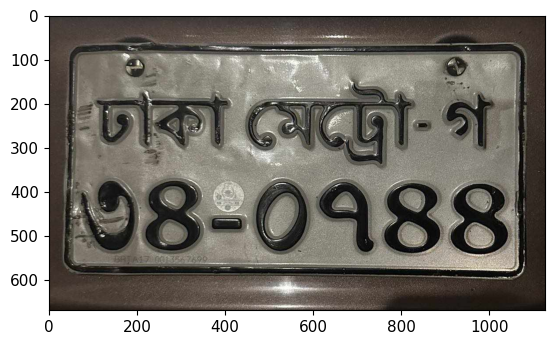

In [ ]:
import cv2
crop_img = image[bbox[1]:bbox[3], bbox[0]:bbox[2]]

%matplotlib inline
plt.imshow(cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB))

In [ ]:

model = torch.hub.load('ultralytics/yolov5', 'custom','/content/drive/MyDrive/GDSharer/number_detect/weights/number_detect_best.pt')
results = model(crop_img)

# Assuming results is the object containing detection results
results.pandas().xyxy[0]

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-4-4 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 212 layers, 21261075 parameters, 0 gradients, 49.2 GFLOPs
Adding AutoShape... 


,xmin,ymin,xmax,ymax,confidence,class,name
0,902.991516,371.934784,1051.285034,546.859985,0.931330,4,4
1,602.580383,369.269043,741.560364,549.006226,0.926935,7,7
2,441.871918,134.002731,827.533325,352.282593,0.922928,10,Metro
3,86.473801,163.977921,406.884552,319.081482,0.919667,49,Dhaka
4,748.542480,365.286072,894.937866,545.759705,0.919560,4,4
5,61.477543,356.451935,199.037201,534.328979,0.917613,3,3
6,465.179688,359.302612,598.609436,541.186768,0.910640,0,0
7,885.817078,144.363998,1008.857300,311.824066,0.889878,18,Ga
8,205.027756,358.491211,353.192413,533.445374,0.823055,4,4
